In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [72]:
dataFrame = pd.read_csv('veriler.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


Veri Okuma

In [73]:
dataFrame.describe() ## Verinin istatistikleri

,boy,kilo,yas
count,22.000000,22.000000,22.000000
mean,163.363636,62.136364,28.681818
std,21.077059,22.286651,12.988590
min,125.000000,30.000000,9.000000
25%,156.000000,42.500000,22.250000
50%,165.500000,59.500000,28.500000
75%,179.250000,80.000000,38.000000
max,193.000000,105.000000,55.000000


In [74]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

ulke        0
boy         0
kilo        0
yas         0
cinsiyet    0
dtype: int64

Veri Temizliği

In [68]:
# dataFrame = dataFrame.iloc[5:]

<AxesSubplot:xlabel='boy', ylabel='kilo'>

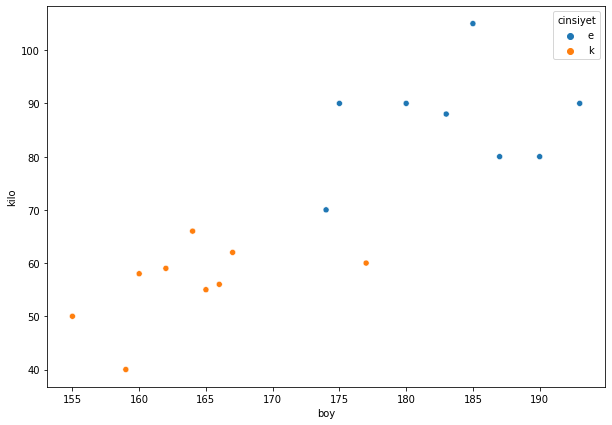

In [69]:
# plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
# sbn.scatterplot(x='boy',y='kilo',hue = "cinsiyet",data=dataFrame) ## Noktasal grafik

Grafiksel Analiz

<AxesSubplot:xlabel='boy', ylabel='kilo'>

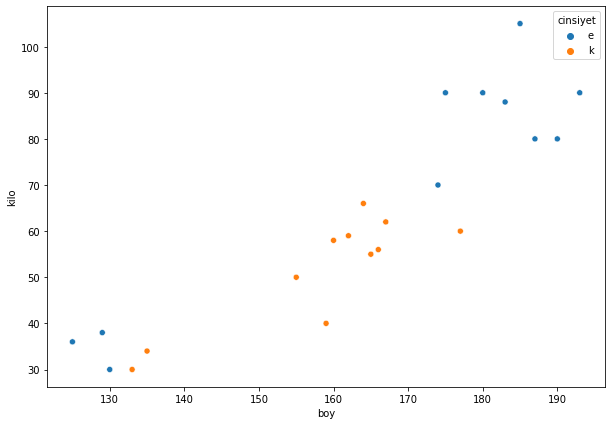

In [75]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='boy',y='kilo',hue = "cinsiyet",data=dataFrame) ## Noktasal grafik

In [76]:
cinsiyet = dataFrame.iloc[:,4:5].values
cinsiyet

array([['e'],
       ['e'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['e'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['k'],
       ['k']], dtype=object)

In [77]:
from sklearn import preprocessing

In [78]:
labelEncoder = preprocessing.LabelEncoder()
cinsiyet[:,0] = labelEncoder.fit_transform(dataFrame.iloc[:,4:5])
cinsiyet

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [79]:
oneHotEncoder = preprocessing.OneHotEncoder()
cinsiyet = oneHotEncoder.fit_transform(cinsiyet).toarray()
cinsiyet

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Model Oluşturma

In [80]:
y = cinsiyet ## dataFrame.iloc[:,4:5] ## cinsiyet ## Bağımlı ## cinsiyet
x = dataFrame.iloc[:,1:3].values ## Bağımsız

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
standardScaler = StandardScaler()
x = standardScaler.fit_transform(x)
# x_test = standardScaler.fit_transform(x)

In [83]:
from sklearn import naive_bayes as nb

In [84]:
h = .02

In [85]:
Gaussian = nb.GaussianNB().fit(x, y[:,0])
Bernoulli = nb.BernoulliNB().fit(x, y[:,0])

In [86]:
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [87]:
# title for the plots
titles = ['GaussianNB',
          'BernoulliNB']

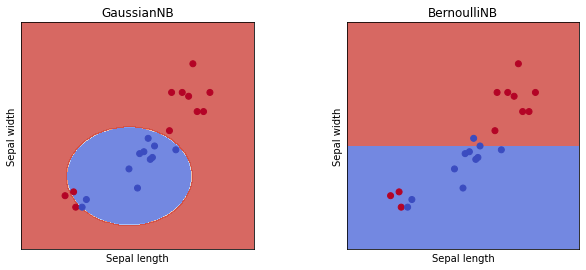

In [90]:
plt.figure(figsize=(10,10))
for i, clf in enumerate((Gaussian, Bernoulli)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y[:,0], cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()